In [2]:
#%matplotlib inline

import numpy as np
import itertools
import random
import math
import matplotlib.pyplot as plt

import import_ipynb
from rules import Game
from players import RandomPlayer, GreedyPlayer, MCTSPlayer, UCTPlayer, GreedyUCTPlayer, HumanPlayer

In [ ]:
### def play_game(player, opponent):
    game = Game.start_game()
    opponent_action = -1

    while not game.game_finished:
        player_action = player.play(opponent_action)
        game, captures, finished = game.step(player_action)

        player, opponent = opponent, player
        opponent_action = player_action
    return game

In [3]:
player = MCTSPlayer(0, 100)
opponent = HumanPlayer(1)

#endstate = play_game(player, opponent)
#print(endstate.winner)
#endstate.show_state()

In [6]:
%%time
RUNS = 7
factories = [
    ("Random", lambda x: RandomPlayer(x)),
    ("Greedy", lambda x: GreedyPlayer(x)),
    
    ("MCTS 20", lambda x: MCTSPlayer(x, 20)),
    ("MCTS 100", lambda x: MCTSPlayer(x, 100)),
    
    ("UCT 20", lambda x: UCTPlayer(x, 20)),
    ("UCT 100", lambda x: UCTPlayer(x, 100)),
    
    ("Greedy UCT 20", lambda x: GreedyUCTPlayer(x, 20)),
    ("Greedy UCT 100", lambda x: GreedyUCTPlayer(x, 100)),
]

names = [x[0] for x in factories]
games = []

res = np.zeros((len(factories), len(factories), 2))
for (i, (name1, factory1)), (j, (name2, factory2)) in itertools.product(enumerate(factories), repeat=2):
    if i >= j:
        continue
    for _ in range(RUNS):
        player = factory1(0)
        opponent = factory2(1)

        endstate = play_game(player, opponent)
        res[i,j, endstate.winner] += 1
        games.append((name1, name2, endstate))
        print(".")

ratios = res[:,:, 1] - res[:,:, 0]

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
CPU times: user 2h 21min 35s, sys: 3.19 s, total: 2h 21min 38s
Wall time: 2h 50min 17s


<Figure size 432x288 with 0 Axes>

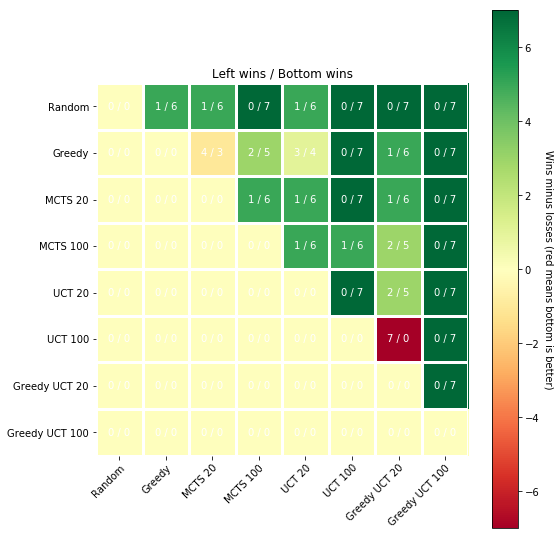

In [29]:
plt.set_cmap('RdYlGn')

fig, ax = plt.subplots(figsize=(8,8))

bornes = abs(ratios).max()
im = ax.imshow(ratios, vmin=-bornes, vmax=bornes)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Wins minus losses (red means bottom is better)", rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))

ax.set_xticklabels(names)
ax.set_yticklabels(names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(names)):
    for j in range(len(names)):
        s = "%i / %i" % (res[i, j, 0], res[i, j, 1])
        text = ax.text(j, i, s,
                       ha="center", va="center", color="w")

for edge, spine in ax.spines.items():
        spine.set_visible(False)
ax.set_xticks(np.arange(ratios.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(ratios.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
        
ax.set_title("Left wins / Bottom wins")
fig.tight_layout()
plt.show()

In [ ]:
player = GreedyUCTPlayer(0, 100)
opponent = HumanPlayer(1)

endstate = play_game(player, opponent)
print(endstate.winner)
endstate.show_state()

In [26]:
nchilds = []
depths = []
for _, _, game in games:
    node = game
    depths.append(node.depth)
    while node.parent:
        nchilds.append(len(node.legal_actions))
        node = node.parent

(array([27., 61., 31., 33., 17., 17.,  4.,  3.,  1.,  2.]),
 array([ 16. ,  31.3,  46.6,  61.9,  77.2,  92.5, 107.8, 123.1, 138.4,
        153.7, 169. ]),
 <a list of 10 Patch objects>)

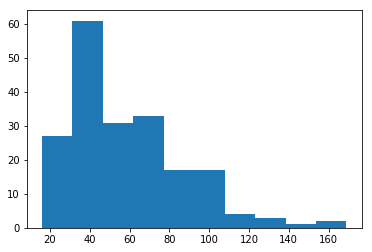

In [41]:
plt.hist(depths)